In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
# data.pkl can be collected using the evaluation script, simply by mannually saving data after testing.
# Important things for visualization: input pos (x_in), target pos (x_end), the prediction (x_gmn) 
# and the cfg (kinematics decomposition).
with open('data.pkl', 'rb') as f:
    a = pkl.load(f)

In [4]:
print(len(a))
idx = 919  # the index of the system to visualize
case = a[idx]
x_in, x_end, x_gmn, cfg = case['loc'], case['loc_end'], case['loc_pred_gmn'], case['cfg']

2000

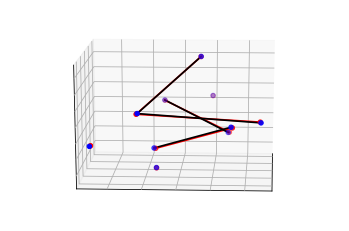

In [122]:
# Visualize the prediction and target

fig = plt.figure()
ax = fig.gca(projection='3d')
lw = 1.7

ax.scatter(x_end[...,0], x_end[...,1], x_end[...,2], color="r")

ax.scatter(x_gmn[...,0], x_gmn[...,1], x_gmn[...,2], color="b")


for s in cfg['Stick']:
    cur_x = x_end[s]
    ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='red', linewidth=lw)

for h in cfg['Hinge']:
    cur_x = np.array([x_end[h[0]], x_end[h[1]]])
    ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='red', ls='-', linewidth=lw)
    cur_x = np.array([x_end[h[0]], x_end[h[2]]])
    ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='red', ls='-', linewidth=lw)

for s in cfg['Stick']:
    cur_x = x_gmn[s]
    ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='black', linewidth=lw)

for h in cfg['Hinge']:
    cur_x = np.array([x_gmn[h[0]], x_gmn[h[1]]])
    ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='black', ls='-', linewidth=lw)
    cur_x = np.array([x_gmn[h[0]], x_gmn[h[2]]])
    ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='black', ls='-', linewidth=lw)

ax.view_init(elev=15., azim=183)  # select a good view

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)
    
plt.savefig('gmn.pdf')

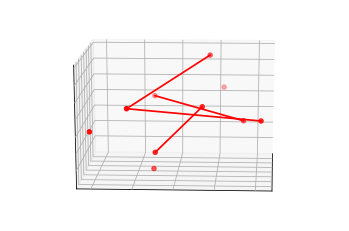

In [123]:
# Visualize the input

fig = plt.figure()
ax = fig.gca(projection='3d')
lw = 1.7

ax.scatter(x_in[...,0], x_in[...,1], x_in[...,2], color="r")

for s in cfg['Stick']:
    cur_x = x_in[s]
    ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='red', linewidth=lw)

for h in cfg['Hinge']:
    cur_x = np.array([x_in[h[0]], x_in[h[1]]])
    ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='red', ls='-', linewidth=lw)
    cur_x = np.array([x_in[h[0]], x_in[h[2]]])
    ax.plot(cur_x[..., 0], cur_x[..., 1], cur_x[..., 2], color='red', ls='-', linewidth=lw)

ax.view_init(elev=15., azim=183)  # select a good view

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

for line in ax.xaxis.get_ticklines():
    line.set_visible(False)
for line in ax.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax.zaxis.get_ticklines():
    line.set_visible(False)
    
plt.savefig('input.pdf')